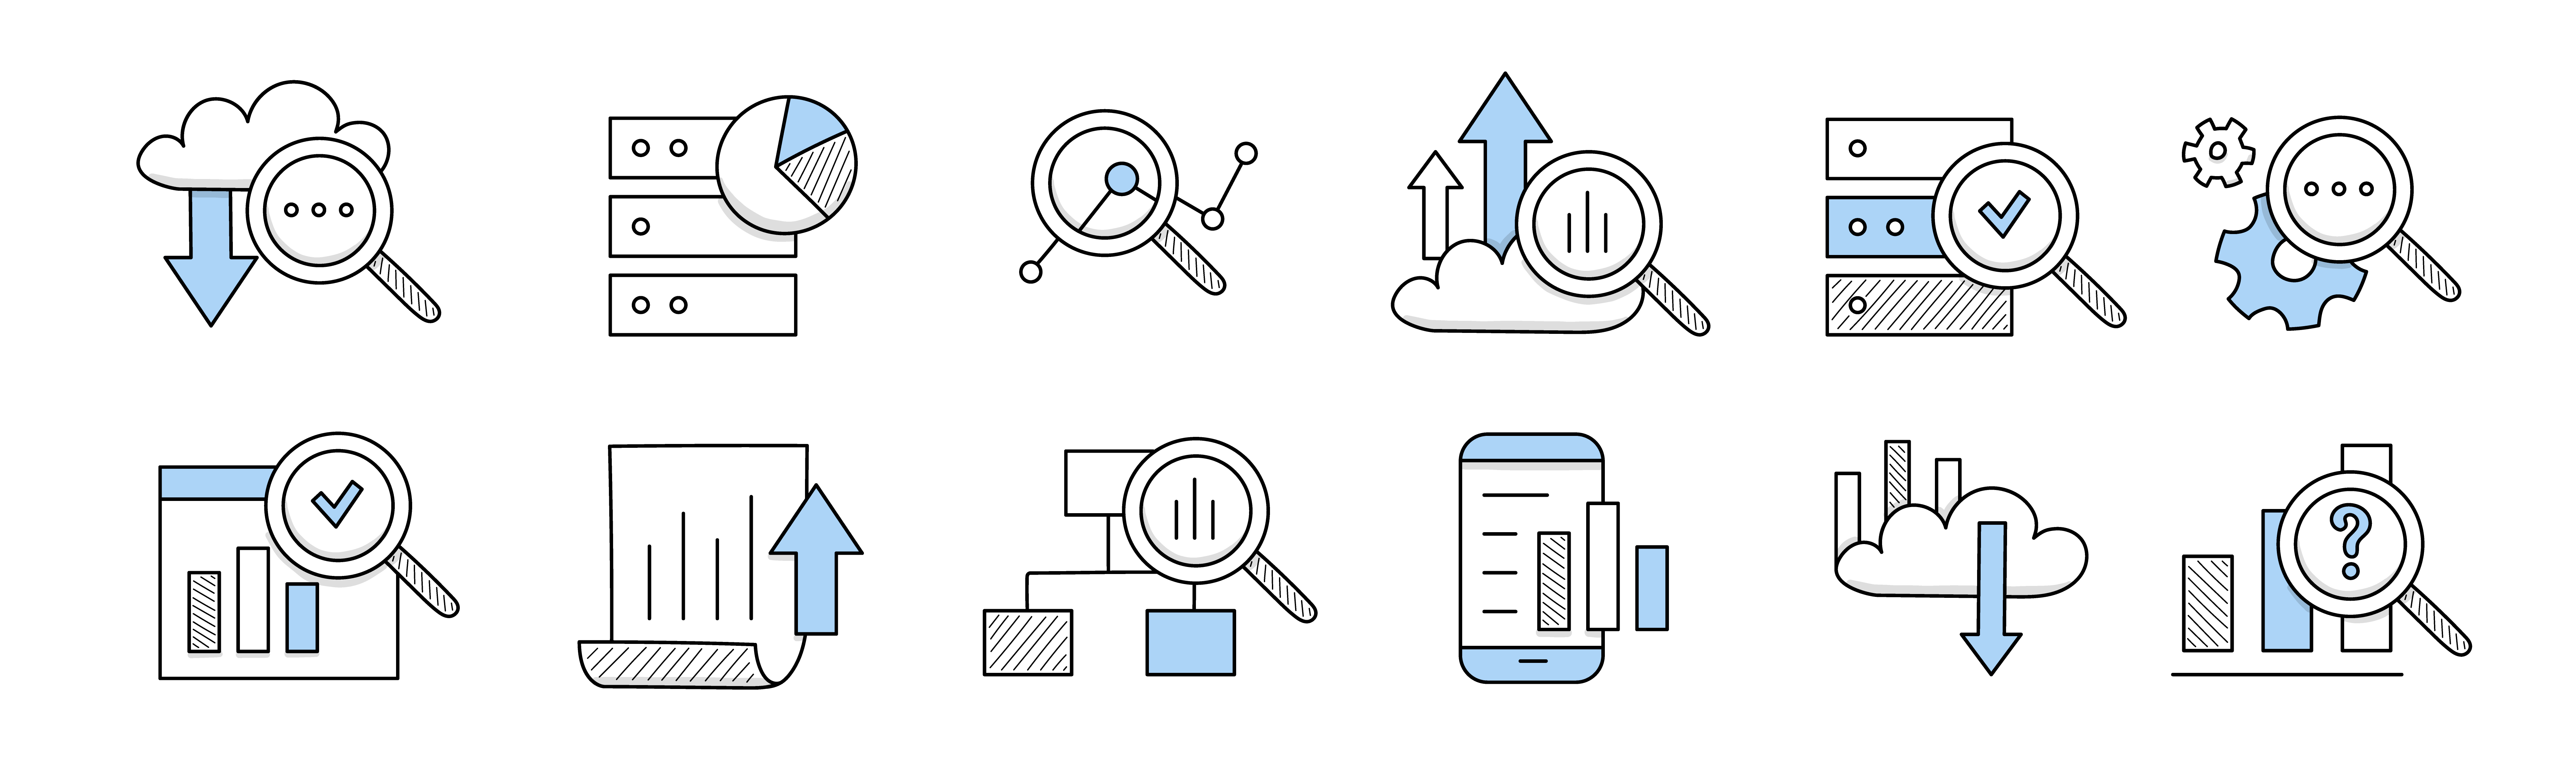

# 

# Scrapping NEWS from websites 

# 

In [1]:
from bs4 import BeautifulSoup as soup
import requests
import pandas as pd
import mysql.connector

# 

# Scrapping from THE HINDU website

## 

In [2]:
r=requests.get("https://www.thehindu.com/news/cities/chennai/")
b=soup(r.content)

In [3]:
link=[]
for i in b.findAll('h3',{"class":"title"}):
    link.append(i.a['href'])

In [4]:
TH={"title":[],"news":[]}
for i in link:
    req=requests.get(i)
    blog=soup(req.content)
    for h in blog.findAll("h1"):
        TH['title'].append(h.text)
    for h in blog.findAll('p'):
        a=(h.text.strip())
    TH["news"].append(a)

In [5]:
news = pd.DataFrame.from_dict(TH)

In [6]:
news.head(5)

,title,news
0,\nRare winter depression may bring isolated he...,We have migrated to a new commenting platform....
1,\nMDMK councillor asks Council to pass resolut...,We have migrated to a new commenting platform....
2,\nGreater Chennai Corporation and CMDA to begi...,We have migrated to a new commenting platform....
3,\nOnly Family Courts can issue Khula divorce c...,We have migrated to a new commenting platform....
4,\nIndia International Leather Fair to begin fr...,We have migrated to a new commenting platform....


# 

# Scrapping from INDIA TODAY  website

# 

In [7]:
r=requests.get("https://www.indiatoday.in/cities/chennai-news")
b=soup(r.content)

In [8]:
link=[]
for i in b.findAll('div',{"class":"B1S3_content__wrap__9mSB6"}):
    a="https://www.indiatoday.in"+(i.a['href'])
    link.append(a)

In [9]:
IT={"title":[],"news":[]}
for i in link:
    req=requests.get(i)
    blog=soup(req.content)
    for h in blog.findAll("h1"):
        IT['title'].append(h.text)
    for h in blog.findAll('div',{'class':'jsx-99cc083358cc2e2d Story_description__fq_4S description'}):
        a=(h.text.strip())
    IT["news"].append(a)

In [10]:
IT = pd.DataFrame.from_dict(IT)
news=news.append(IT)

C:\Users\ajesh\AppData\Local\Temp\ipykernel_6080\328406738.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news=news.append(IT)


In [11]:
IT.head(5)

,title,news
0,Ruckus in Chennai amid public hearing on propo...,By Shilpa Nair: A ruckus broke out in Chennai ...
1,Chennai techie dies after wall of dilapidated ...,By Shilpa Nair: A 22-year-old woman died in Ch...
2,Metro bus conductor suspended in Chennai for b...,By Pramod Madhav: A Chennai Metro bus conducto...
3,Joy of Jallikattu: Tamil Nadu decks up for cen...,By Pramod Madhav: A Chennai Metro bus conducto...
4,Tamil Nadu Governor RN Ravi walks out of Assem...,By India Today Web Desk: Tamil Nadu Governor R...


# 

# Scrapping from NDTV  website

# 

In [12]:
r=requests.get("https://www.ndtv.com/chennai-news")
b=soup(r.content)

In [13]:
link=[]
for i in b.findAll('h2',{"class":"newsHdng"}):
    link.append(i.a['href'])

In [14]:
ND={"title":[],"news":[]}
for i in link:
    req=requests.get(i)
    blog=soup(req.content)
    for h in blog.findAll("h1"):
        ND['title'].append(h.text)
    for h in blog.findAll('div',{'class':'sp-cn ins_storybody'}):
        a=(h.text.strip())
    ND["news"].append(a)

In [15]:
ND = pd.DataFrame.from_dict(ND)
news=news.append(ND)
ND.head()

C:\Users\ajesh\AppData\Local\Temp\ipykernel_6080\2902079977.py:2: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  news=news.append(ND)


,title,news
0,Our Struggle Against Hindi Imposition Will Co...,Tamil Nadu CM alleged that the BJP government ...
1,Judges' Appointment Body Pushes For Advocate ...,Advocate R John Sathyan has been recommended f...
2,Che Guevara's Daughter In Chennai To Attend C...,Aleida Guevara was accorded a warm welcome at ...
3,"Rs 17,000-Crore Bengaluru-Chennai Expressway ...","""By February 2023, the Bengaluru-Mysuru Highwa..."
4,Chennai Police Arrest 2 DMK Members For Sexua...,The two accused have been arrested by police. ...


In [16]:
news=news.values.tolist()

# 

# Connecting to SQL

# 

In [17]:
scrap_db=mysql.connector.connect(
host="localhost",
user="Ajesh 1st",
passwd="Ajesh1161",
database="ajesh 1st"
)
cursor=scrap_db.cursor()

In [18]:
#cursor.execute("DROP TABLE IF EXISTS NEWS ")
# Create table as per requirement
#sql = """CREATE TABLE NEWS (
#title VARCHAR(20),
#news  VARCHAR(100)
# )"""
#cursor.execute(sql)

# 

# Inserting Data into a Database

# 

In [19]:
mySql_insert_query = """INSERT INTO NEWS (title,news) 
VALUES (%s, %s) """

records_to_insert = news


cursor.executemany(mySql_insert_query, records_to_insert)
scrap_db.commit()
print(cursor.rowcount, "Record inserted successfully into Population table")

56 Record inserted successfully into Population table


# 

# Deleting Duplicate NEWS

# 

In [20]:
cursor.execute("select * from news")
news=cursor.fetchall()
x2=[]
for i in news:
    x2.append(i)

In [21]:
x2=pd.DataFrame.from_dict(x2)

In [22]:
x2 = x2.drop_duplicates(subset=0, keep='last')
news=x2.values.tolist()

In [23]:
cursor.execute("DROP TABLE IF EXISTS NEWS ")
#Create table as per requirement
sql = """CREATE TABLE NEWS (
title VARCHAR(20),
news  VARCHAR(100)
 )"""
cursor.execute(sql)

In [24]:
mySql_insert_query = """INSERT INTO NEWS (title,news) 
VALUES (%s, %s) """

records_to_insert = news


cursor.executemany(mySql_insert_query, records_to_insert)
scrap_db.commit()
print(cursor.rowcount, "Record inserted successfully into Population table")

54 Record inserted successfully into Population table
